<h1>The Effect Age & Experience has on Minecraft Player's Total Hours!</h1>

<h1>Introduction</h1>

<p>In this project, we are looking into a dataset collected from player activity on a Minecraft server. Minecraft is a open world survival video game, and player data can provide valuable insight into the video game industry.</p>

<h3>Question:</h3>
<p><b>Can player experience and age accurately predict total played hours on a server?</b></p>


<h3>Data Description</h3>
<p>We are focusing only on the players data set.</p>

<h3>players.csv</h3>
<ul>
    <li>196 Observations</li>
    <h4>Variables:</h4>
    <li>9 Variables</li>
    <li><b>experience: </b>Character, player's experience in Minecraft</li>
    <li><b>subscribe: </b>Boolean, is player subscribed to PlaiCraft's email updates?</li>
    <li><b>hashedEmail: </b>Character, player's email</li>
    <li><b>played_hours: </b>Double, amount of hours player has played on the server</li>
    <li><b>name: </b>Character, name of player</li>
    <li><b>gender: </b>Character, gender of player</li>
    <li><b>age: </b>Double, age of player</li>
    <li><b>individualID:</b> Boolean, ID of player</li>
    <li><b>organizationName:</b> Boolean, player's organization name</li>
    <h4>Potential Issues</h4>
    <li>experience and gender should be categorical (factor) instead of characters</li>
    <li>individualID and organizationName has only N/A values, so these two variables should be disgarded</li>
</ul>


<h2>sessions.csv</h2>
<ul>
    <li>1535 Observations</li>
    <h4>Variables:</h4>
    <li>5 Variables</li>
    <li><b>hashedEmail: </b>Character, player's email</li>
    <li><b>start_time: </b>Character, time player begins session</li>
    <li><b>end_time: </b>Character, time player ends session</li>
    <li><b>original_start_time: </b>Double, time player beings session in UNIX time</li>
    <li><b>original_end_time: </b>Double, time at which player ends session in UNIX time</li>
    <h4>Issues</h4>
    <li>values under start_time and end_time have a space between date and time > data is untidy</li>
    <li>start_time and end_time should be converted the Date objects which should make the data tidy</li>
    <li>original_start_time and original_end_time use scientific notation which may pose issues</li>
</ul>


<h1>Methods and Results</h1>

In [1]:
# Load the data set + libraries: 
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library(cowplot)

players_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")

sessions_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<p>We will split the data 75% training and 25% testing and then select the experience, age and played_hours variables since thats all we need from the dataset.</p>

In [2]:
set.seed(1234)

# Split the data into training and testing data + wrangling

players_data_split <- initial_split(players_data, prop=0.75, strata=played_hours)
players_data_train <- training(players_data_split)
players_data_test <- testing(players_data_split)

# wrangle to tidy

players_data_tidy_train <- players_data_train |>
                        mutate(experience=as_factor(experience)) |>
                        select(experience, age, played_hours)

<h1>Exploratory Data Analysis</h1>

<h3>Age</h3>

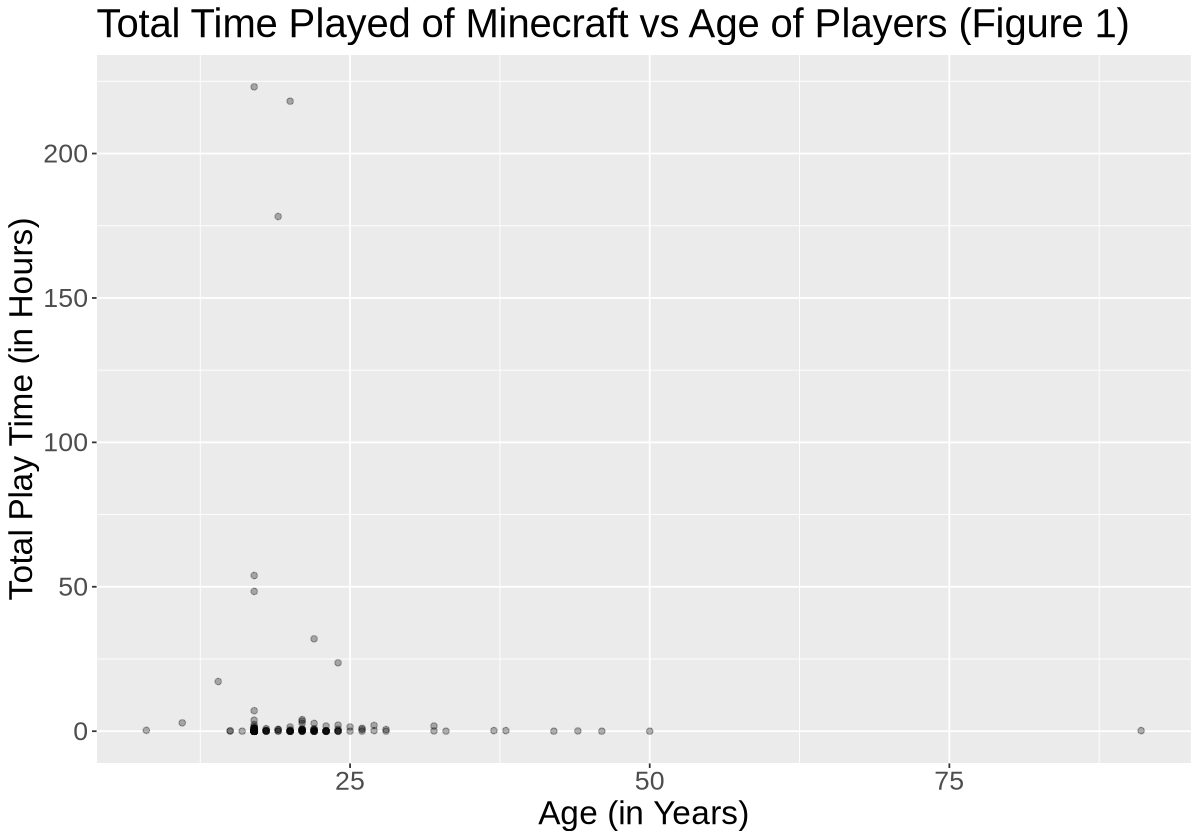

In [3]:
#Code for Age

options(repr.plot.width = 10, repr.plot.height = 7)

options(repr.plot.width = 10, repr.plot.height = 7)

playtime_age_plot <- ggplot(players_data_tidy_train, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.3) +
    labs(title = "Total Time Played of Minecraft vs Age of Players (Figure 1)", 
    x = "Age (in Years)", y = "Total Play Time (in Hours)") +
    theme(text = element_text(size = 20)) 

playtime_age_plot 




In the initial graph made in Figure 1, you can see that due to some outliers (players who have played for an excessive amount of hours or are significantly older than most players), it is hard to interpret the data. Thus, we will create another graph significantly zoomed in on the plot to better observe it. 

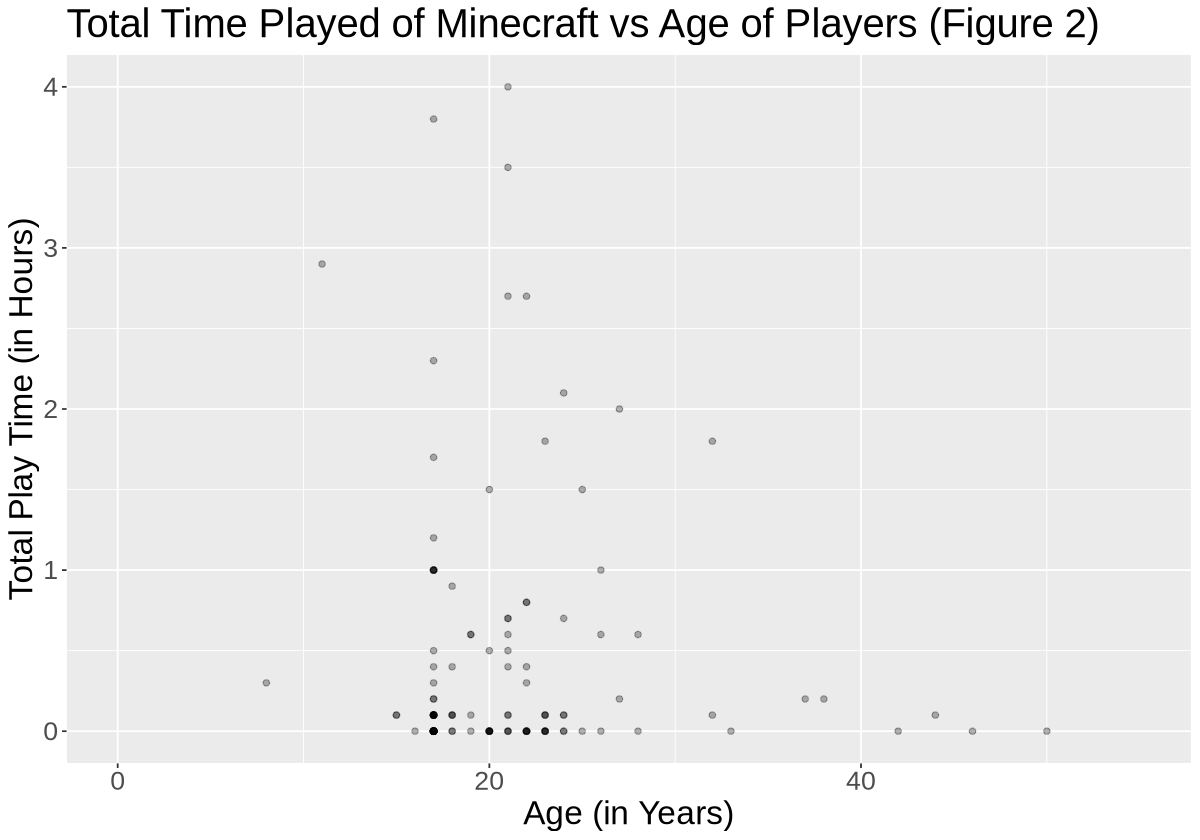

In [4]:
# Points are very clustered
# The limit on the y-axis was set to 4 hours  
# The limit on the x-axis was set to an age of 55

zoomedin_playtime_age_plot <- ggplot(players_data_tidy_train, aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.3) +
    coord_cartesian(ylim = c(0, 4), xlim = c(0, 55)) +
    labs(title = "Total Time Played of Minecraft vs Age of Players (Figure 2)", 
    x = "Age (in Years)", y = "Total Play Time (in Hours)") +
    theme(text = element_text(size = 20)) 
        
zoomedin_playtime_age_plot

In Figure 1 and Figure 2, there initially does **not** seem to be much of a correlation between age and total played hours, especially with many of the points overlapping. As there also seems to be no well-defined linear relationship, it would be best to use KNN regression for our analysis of this variable (as linear regression is built for linear correlations). 

<h3>Experience</h3>
<p>First, we will average the total playtime for each category and plot it.</p>

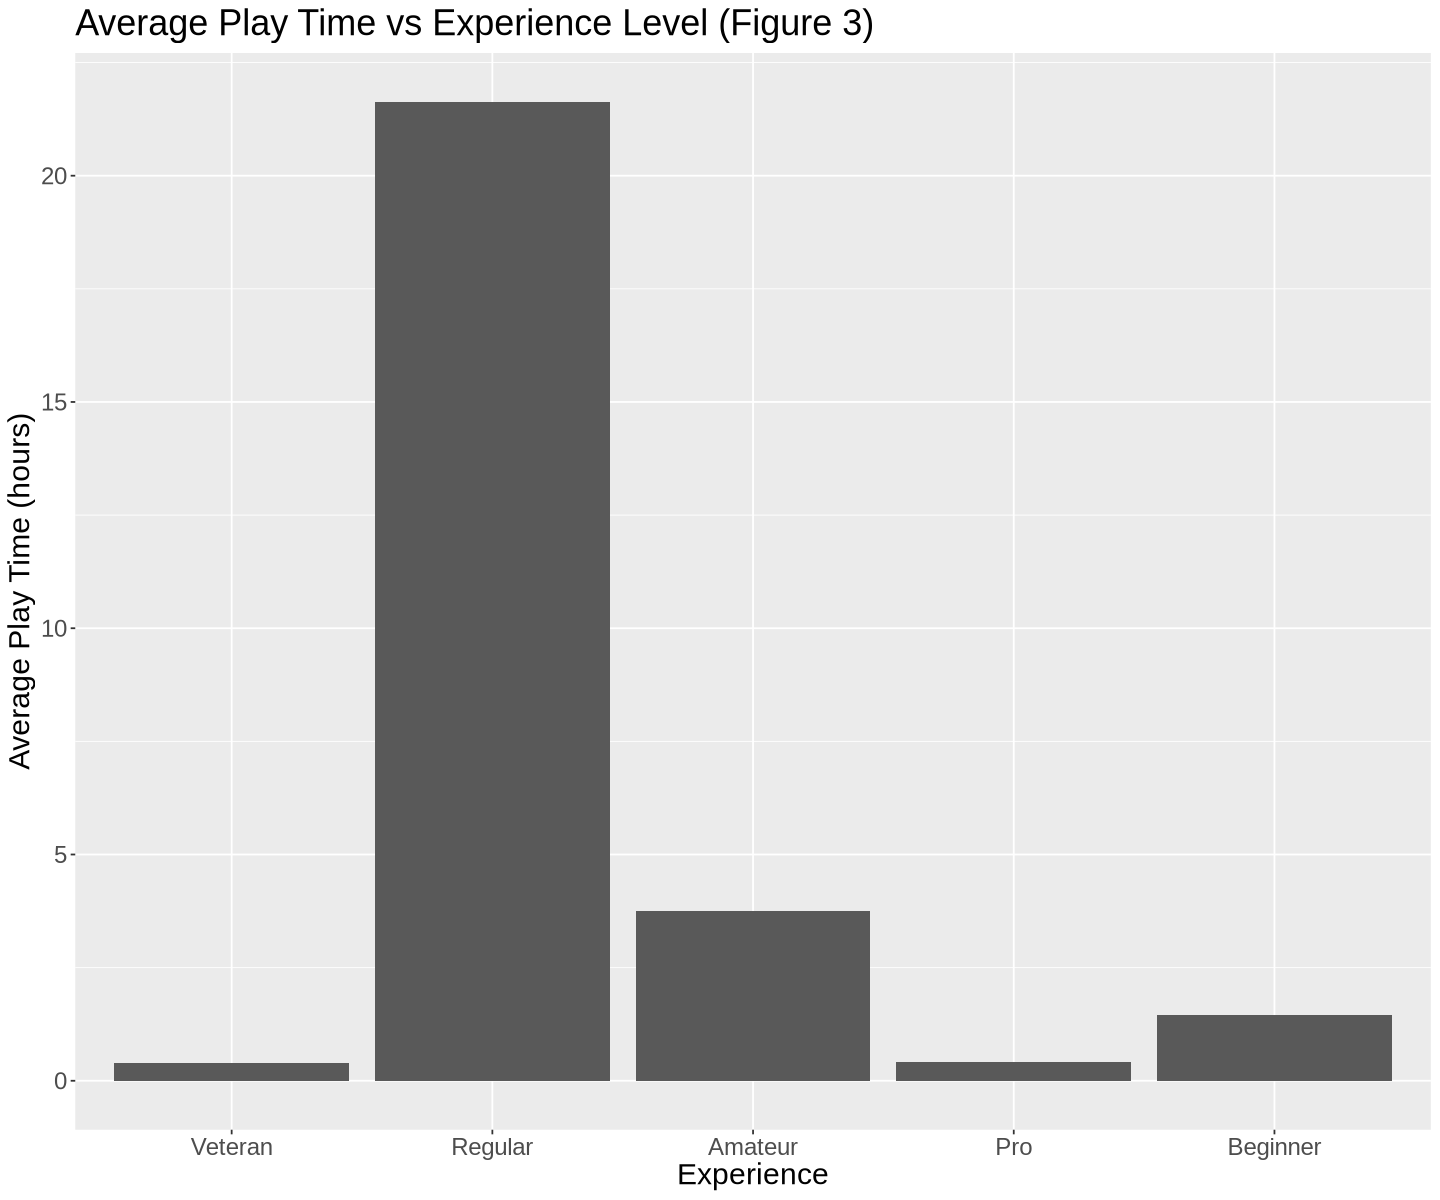

In [5]:
#Code for Experience

options(repr.plot.width = 12, repr.plot.height = 10)

player_data_average_graph <- players_data_tidy_train |>
                        group_by(experience) |>
                        summarize(average = mean(played_hours)) |>  # average play hours for each experience group
                        ggplot(aes(experience, average)) + # graph
                        geom_bar(stat="identity") +
                        labs(x="Experience", y="Average Play Time (hours)", title="Average Play Time vs Experience Level (Figure 3)") +
                        theme(text=element_text(size=18))

player_data_average_graph


<p>In Figure 3, the Minecraft players with the a regular experience level have a significantly higher total played time on average compared to the other experience levels. Therefore, the KNN regression will most likely predict for Minecraft players with a regular experience level to have high total played time.</p>
<p>Since experience is a categorical value, we must convert it to a form that can be used in regression. We will be using the one-hot encoding method.</p>

In [6]:
player_data_one_hot_encoding <- dummyVars(" ~ experience ", data=players_data_tidy_train) # one-hot encoding the data to convert categorical to numerical

encoded_player_data <- predict(player_data_one_hot_encoding, newdata=players_data_tidy_train) 

encoded_player_data <- cbind(players_data_tidy_train, encoded_player_data)

<p>We will then plot the one-hot encoded value for each category and compare.</p>

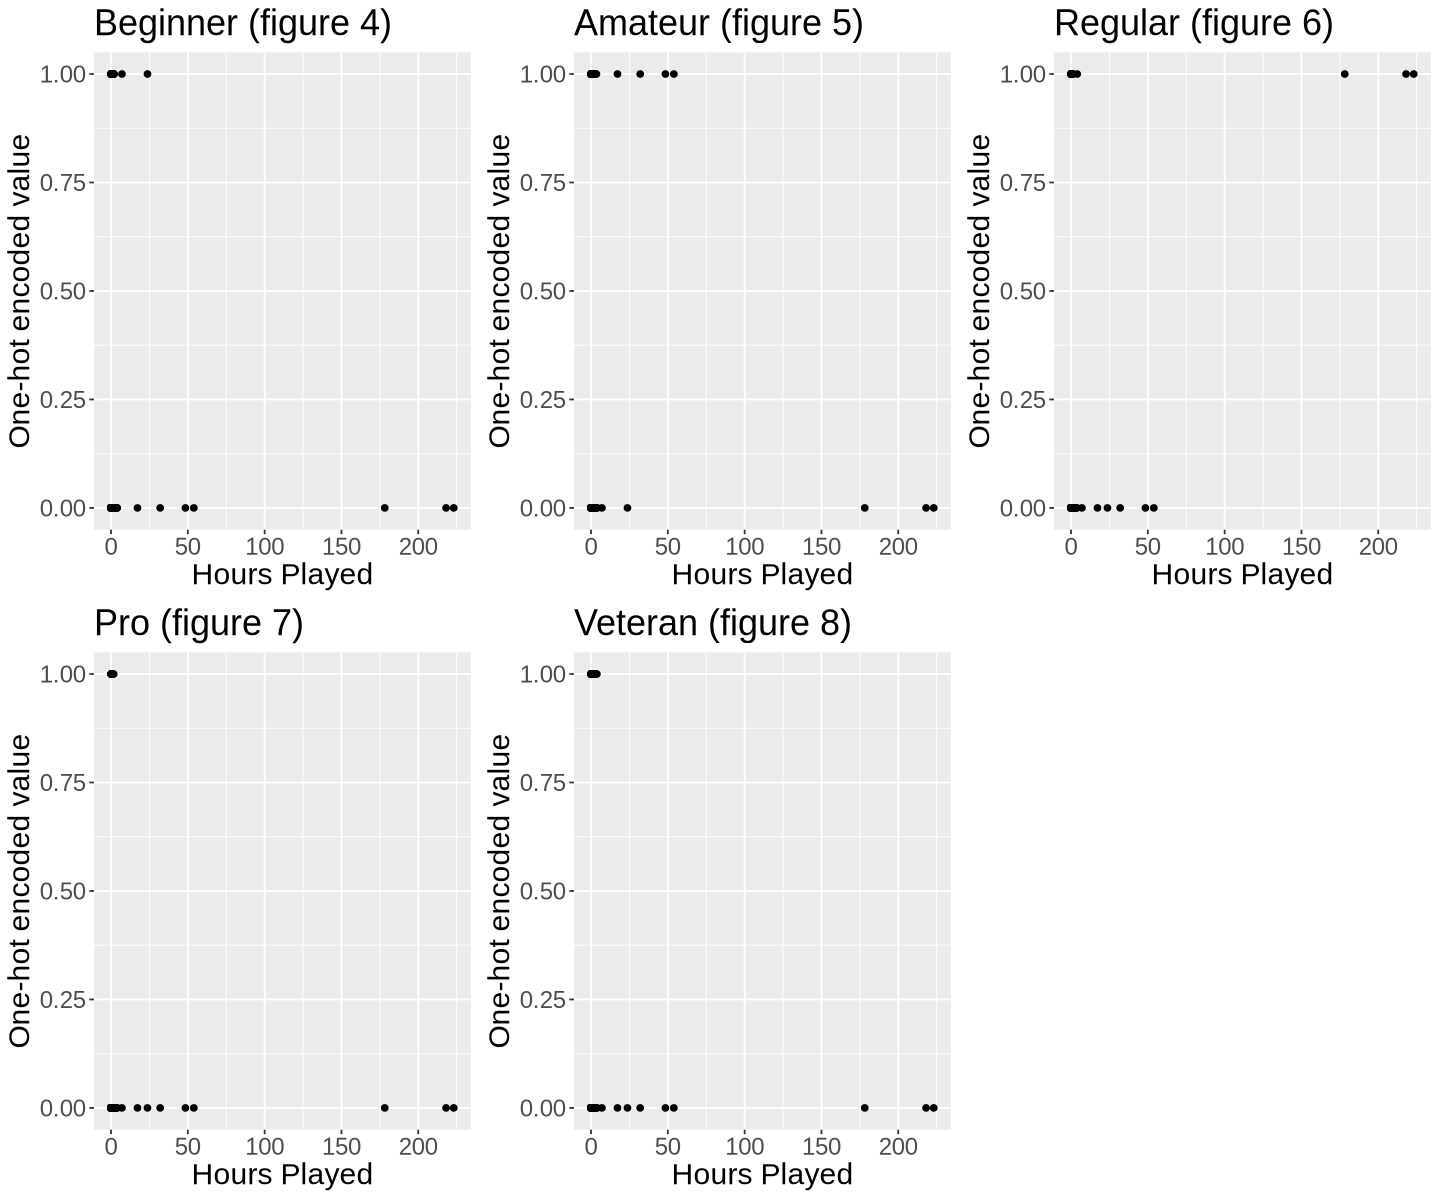

In [7]:
Veteran_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Veteran)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Veteran (figure 8)") +
                            theme(text=element_text(size=18))

Regular_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Regular)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Regular (figure 6)") +
                            theme(text=element_text(size=18))

Amateur_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Amateur)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Amateur (figure 5)") +
                            theme(text=element_text(size=18))

Pro_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Pro)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Pro (figure 7)") +
                            theme(text=element_text(size=18))

Beginner_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Beginner)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Beginner (figure 4)") +
                            theme(text=element_text(size=18))

encoded_player_graph <- plot_grid(
    Beginner_encoded_graph,
    Amateur_encoded_graph,
    Regular_encoded_graph,
    Pro_encoded_graph,
    Veteran_encoded_graph) 


#encoded_player_graph
encoded_player_graph

<p>The One-hot encoded values are either 0 or 1 with 0 representing that its corresponding number of hours played does not exist in that category and 1 representing that it does exist. Therefore, we will mostly be focusing on the points with a one-hot encoded value of 1. Looking at Pro (figure 7) and Veteran (figure 8), the points at an one-hot encoded value of 1 are near 0 hours played. Beginner (figure 4) and Amateur (figure 5) have more spread out data points so people in this category played more hours. For Regular (figure 6), it has points with the highest number of played hours. All the graphs do have dark points at 0 hours which indicate most players did not play at all across all categories which will likely affect our final results.</p>

<h1>Data Analysis</h1>

<p>We decided to use knn regression</p>
<ul>
    <l1><b>Why Regression:</b></l1>
    <li>Predicting a numerical variable (total played hours)</li>
    <l1><b>Why K-nearest neighbors:</b></l1>
    <li>The data is not linear.</li>
    <l1><b>Strengths</b></l1>
    <li>simple, intuitive algorithm.</li>
    <li>Assumptions about data isn't required (doesn't have to be linear)</li>
    <l1><b>Weaknesses</b><l1>
    <li>lot of data points, which will slow the process</li>
    <li>cannot accurately predict beyond given predictor values (in age)</li>
</ul>
<p>We preform a 5 fold cross-validation to find the optimal K value.</p>

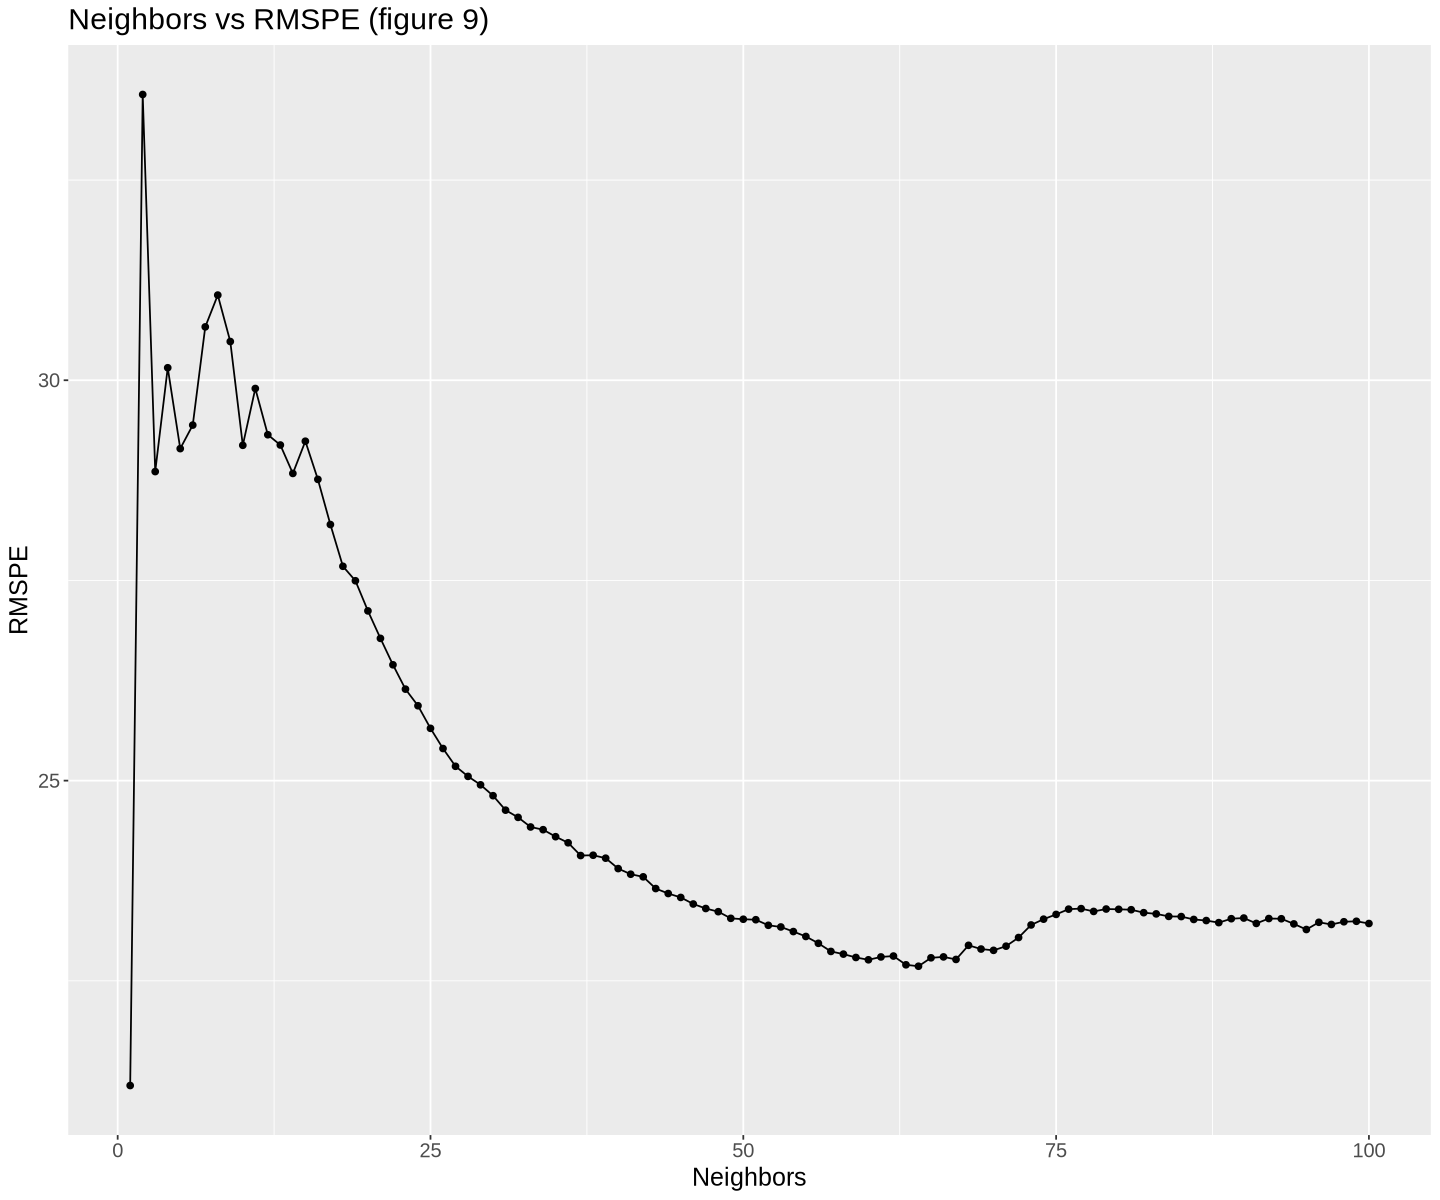

In [8]:
# Code for Regression

player_recipe <- recipe(played_hours ~ age + experience.Veteran + experience.Regular + experience.Amateur + 
                        experience.Pro + experience.Beginner, data=encoded_player_data) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

player_vfold <- vfold_cv(encoded_player_data, v = 5, strata = played_hours)

player_workflow <- workflow() |>
                    add_recipe(player_recipe) |>
                    add_model(player_spec)

gridvals <- tibble(neighbors = seq(from=1,to=100,by=1)) #restricted to 100, otherwise prone to crashing ;(

player_results <- player_workflow |>
                    tune_grid(resamples=player_vfold, grid=gridvals) |>
                    collect_metrics() |>
                    filter(.metric=="rmse")

neighbor_graph <- ggplot(player_results, aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors", y="RMSPE", title="Neighbors vs RMSPE (figure 9)") +
                    theme(text=element_text(size=15))

neighbor_graph

In [9]:
k_min <- player_results |>
            filter(mean == min(mean)) |>
            pull(neighbors)

k_min

[1] 1

<p>Surprisingly, the best k value seems to be 1. This may be due to the number of players with 0 played hours across all categories. Since the testing set needs to have the same variables as the training, we perform one-hot encoding on it.</p>

In [10]:
players_data_tidy_test <- players_data_test |>
                        mutate(experience=as_factor(experience))

player_test_one_hot_encoding <- dummyVars(" ~ experience ", data=players_data_tidy_test) # one-hot encoding the data to convert categorical to numerical

encoded_test_data <- predict(player_data_one_hot_encoding, newdata=players_data_tidy_test) 

encoded_test_data <- cbind(players_data_tidy_test, encoded_test_data)

<p>We then plug our k value into our model.</p>

In [11]:
player_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=k_min) |>
                        set_engine("kknn") |>
                        set_mode("regression")

player_tuned_fit <- workflow() |>
                        add_recipe(player_recipe) |>
                        add_model(player_tuned_spec) |>
                        fit(data=encoded_player_data)

player_preds <- player_tuned_fit |>
                   predict(encoded_test_data) |>
                    bind_cols(encoded_test_data)

results <- metrics(player_preds, truth=played_hours, estimate=.pred) |>
                filter(.metric=="rmse")

results


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.29506


<p>We found that our regression's predictions is on average 23.3 hours off which is not very good. This is likely due to outliers in which a small number of players played for 100+ hours as well as a significant portion playing 0 hours. Additionally, the limited amount of data for age made it difficult to predict anything beyond the age of 25.</p>

<p>We had many issues trying to generate a 3D graph since on of our axis is categorical and not numerical, therefore we plotted the regression line on a 2D graph with age on the x axis, total played hours on the y and experience is the color.</p>

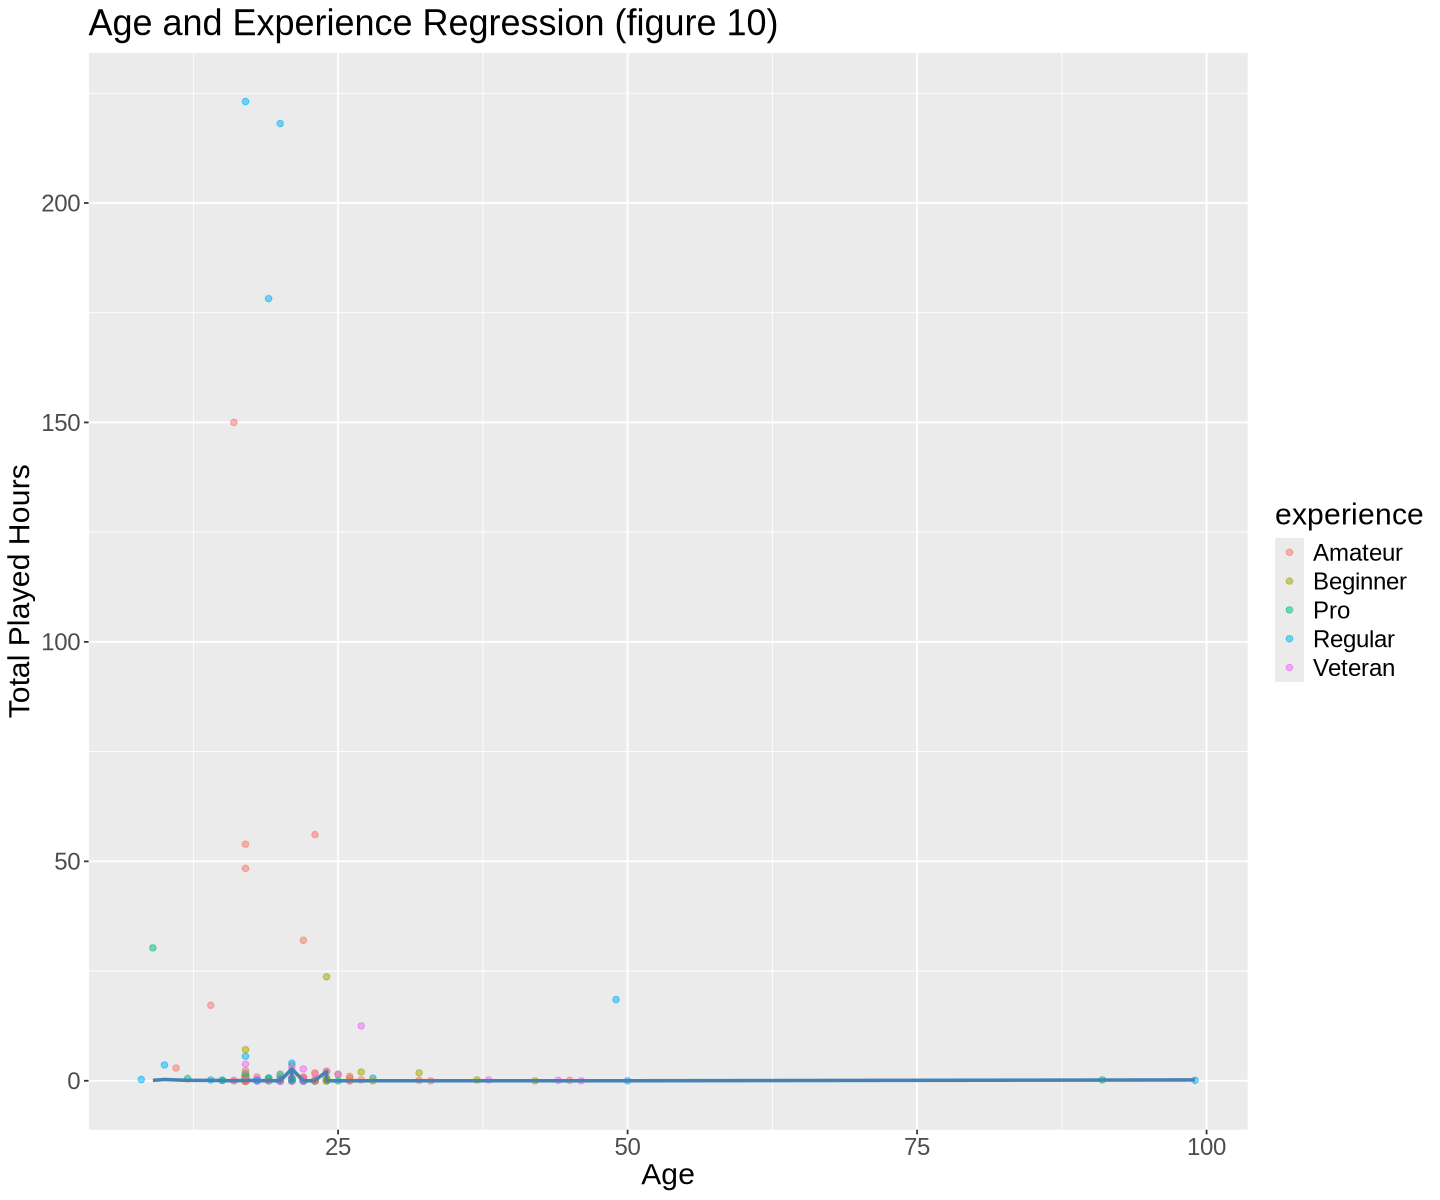

In [12]:
result_graph <- ggplot(players_data, aes(x=age, y=played_hours, color=experience)) +
                    geom_point(alpha=0.5) +
                    geom_line(data=player_preds, 
                             mapping=aes(x=age,y=.pred),
                             color="steelblue",
                             linewidth=1) +
                    labs(x="Age", y="Total Played Hours", title="Age and Experience Regression (figure 10)") +
                    theme(text=element_text(size=18))

result_graph

<p>Looking at figure 10, the regression line simply looks like a horizontal line which is not very useful. Thus we restrict the y-axus (total played hours) to 20 hours and get the following:</p>

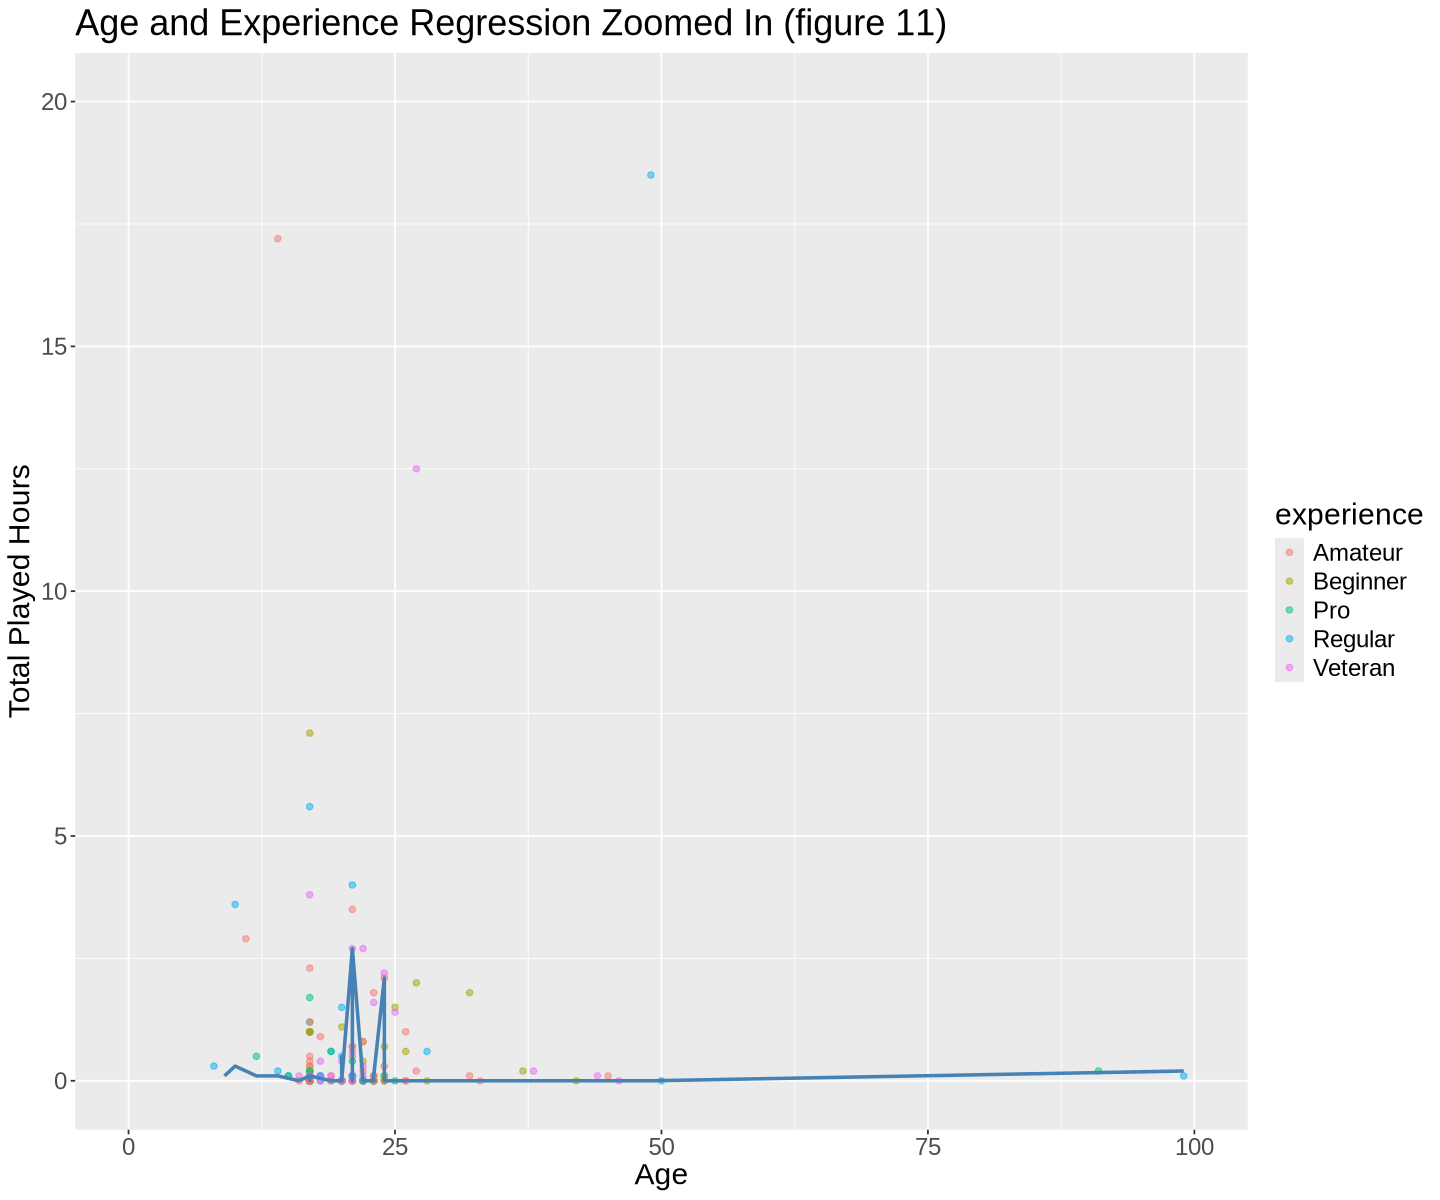

In [13]:
zoomed_result_graph <- ggplot(players_data, aes(x=age, y=played_hours, color=experience)) +
                    geom_point(alpha=0.5) +
                    coord_cartesian(ylim = c(0, 20), xlim = c(0, 100)) +
                    geom_line(data=player_preds, 
                             mapping=aes(x=age,y=.pred),
                             color="steelblue",
                             linewidth=1) +
                    labs(x="Age", y="Total Played Hours", title="Age and Experience Regression Zoomed In (figure 11)") +
                    theme(text=element_text(size=18))

zoomed_result_graph

<h1>Discussion</h1>

<p>According to figure 11, the regression is a relatitvely horizontal line with an exception of some spikes in the range of the ages 17-25 years old. The horizontal line we see is sitting at the zero hours played mark with the spikes that reach around two and a half hours.</p>

<p>The data points of players with high amounts of play time were decieving as they had less of an effect on the model than expected since most of the points are concentrated at low play times. The highest prediction is around 2.5 hours in figure 11 which is significanlty lower than we expected. This is probably because only a handful have played over 100 hours while the rest played for less than 10 hours. Out of the people who played less than 10 hours, a significant amount played 0 hours. In figure 11, the spikes near age 25 are what we expected, but its difficult to compare to older ages due to limited data.</p>

There are various impacts that our findings could have, and one of them is the design of plaicraft. In our project, we found that regular players and those around 17 and 18 have the most played hours. Since these players have a good reading ability and a certain amount of minecraft experience, we can have less tutorials and illustrations for guidance. We could also use more complex words when explaining the rules and have more challenges for any competitiveness. It could also influence the marketing strategies of plaicraft. People around 17 and 18 are usually students and have more free time during the holidays.To allow for more participants to contribute to the data and the success of this research project, it should ensure that it have enough names avaliable during the holidays. Additionally, the server may need an upgrade to have the highest efficiency during that time period. Lastly, it could influence how Plaicraft try to keep their players engaged in the game as we get an insight into their preferences. It could renew its challenges on a monthly basis as older and more experienced players tend to be more competitive. They also like achievements, therefore, rewards or badges could be introduced when they build certain objects in the game. It could also allow players to customize how their minecraft player look like to their liking.

<p>In the future, we could examine whether or not age and experience can impact other time-related variables such as the length of individual play sessions or the time at which individuals start their sessions. We could also look into whether age impacts experience levels, as in what ages tend to be more or less familiar with playing the game. Since one of the major goals for this research is to garner more players, we could also see whether or not advertisement targeted towards certain age groups (in this case probably 17 and 18-year-olds) increases the number of PLAIcraft players. </p>

<h1>References</h1>

Amunategui, M. (n.d.). Brief walkthrough of the dummyvars function from {caret}. Data Exploration & Machine Learning, Hands-on. https://amunategui.github.io/dummyVar-Walkthrough/#:~:text=for%20more%20details%20%3F-,dummyVars,data%20set%20(be%20careful). 

Campbell, T., Lee, M., & Timbers, T. (2024, August 21). Chapter 7 regression I: K-nearest neighbors: Data science. Data Science: A First Introduction. https://datasciencebook.ca/regression1.html 